In [1]:
import folium
import requests
import time
import matplotlib.pyplot as plt
import base64
from io import BytesIO
from IPython.display import display, clear_output
from folium.plugins import MarkerCluster, HeatMap

In [ ]:
API_KEY = "9bce5a691fad475991663701250103"

In [ ]:
CITIES = [
    "Hanoi", "Ho Chi Minh", "Hai Phong", "Nha Trang",
    "Can Tho", "Hue", "Vung Tau", "Da Lat", "Buon Ma Thuot", "Thanh Hoa",
    "Quy Nhon", "Phan Thiet"
] #Vietnam

In [ ]:
CITIES = [
    "Toronto", "Vancouver", "Montreal", "Calgary", "Edmonton",
    "Ottawa", "Winnipeg", "Halifax"
] #Canada

In [ ]:
# Function to generate a temperature trend chart
def create_temperature_chart(temperatures, timestamps):
    plt.figure(figsize=(4, 2))
    plt.plot(timestamps, temperatures, marker="o", linestyle="-", color="red", label="Temp (°C)")
    plt.xticks(rotation=45, fontsize=6)
    plt.yticks(fontsize=6)
    plt.xlabel("Time", fontsize=8)
    plt.ylabel("Temperature (°C)", fontsize=8)
    plt.title("Temperature Trend", fontsize=10)
    plt.legend(fontsize=6)
    plt.grid()

    # Convert the chart to base64 image format
    buffer = BytesIO()
    plt.savefig(buffer, format="png", dpi=100)
    buffer.seek(0)
    encoded_img = base64.b64encode(buffer.getvalue()).decode()
    plt.close()

    return f'<img src="data:image/png;base64,{encoded_img}" width="250"/>'

In [ ]:
# Dictionary to store temperature data over time
city_temperature_data = {city: {"timestamps": [], "temperatures": []} for city in CITIES}


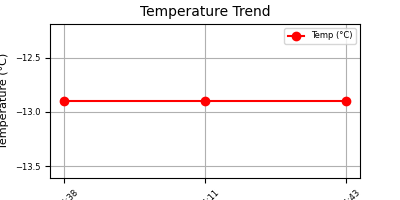
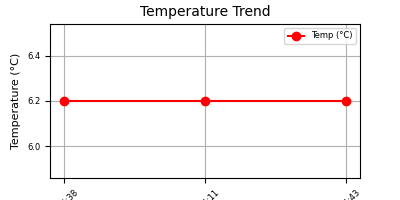
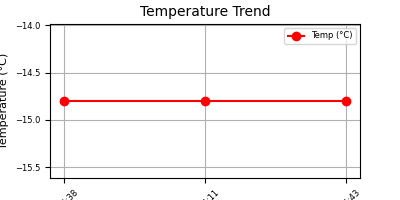
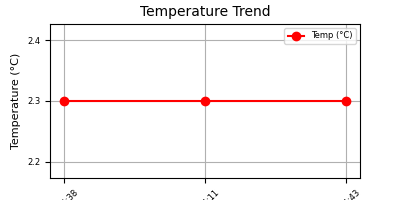
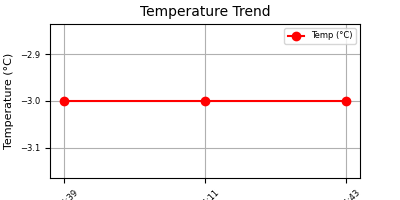
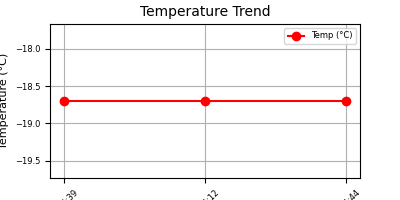
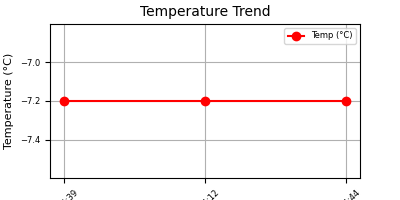
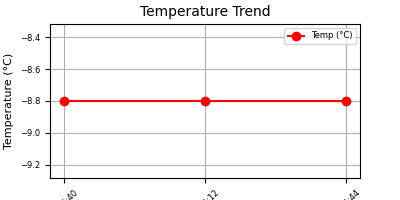
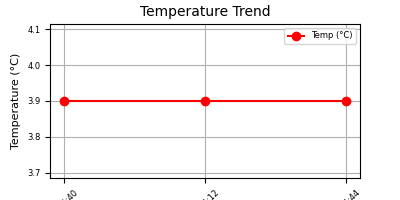
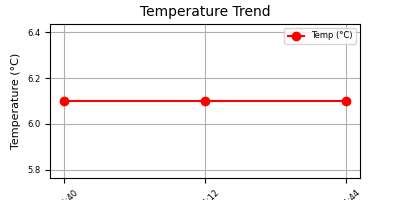

KeyboardInterrupt: 

In [ ]:
while True:
    try:
        # Clear previous output to display the updated map
        clear_output(wait=True)

        # Create a new map
        m = folium.Map(location=[16.0, 108.0], zoom_start=5)
        marker_cluster = MarkerCluster().add_to(m)
        heat_data = []  # Store temperature data for Heatmap

        for city in CITIES:
            # Fetch current weather data from API
            URL_CURRENT = f"http://api.weatherapi.com/v1/current.json?key={API_KEY}&q={city}&aqi=no"
            response = requests.get(URL_CURRENT)
            data = response.json()

            temp_c = data["current"]["temp_c"]
            humidity = data["current"]["humidity"]
            wind_kph = data["current"]["wind_kph"]
            lat = data["location"]["lat"]
            lon = data["location"]["lon"]

            # Store temperature data for chart
            city_temperature_data[city]["timestamps"].append(time.strftime("%H:%M:%S"))
            city_temperature_data[city]["temperatures"].append(temp_c)

            # Keep only the latest 10 data points to avoid memory overload
            if len(city_temperature_data[city]["timestamps"]) > 10:
                city_temperature_data[city]["timestamps"].pop(0)
                city_temperature_data[city]["temperatures"].pop(0)

            # Generate temperature trend chart
            temp_chart = create_temperature_chart(
                city_temperature_data[city]["temperatures"],
                city_temperature_data[city]["timestamps"]
            )

            # Create popup content with weather details and trend chart
            popup_info = (
                f"<b>{city}</b><br>"
                f"🌡️ Temperature: {temp_c}°C<br>"
                f"💧 Humidity: {humidity}%<br>"
                f"🌬️ Wind Speed: {wind_kph} km/h<br>"
                f"{temp_chart}"
            )

            # Add data to Heatmap
            heat_data.append([lat, lon, temp_c])  # (lat, lon, intensity)

            # Change marker icon color based on temperature
            icon_color = "red" if temp_c > 30 else "blue"

            folium.Marker(
                location=[lat, lon],
                popup=folium.Popup(popup_info, max_width=300),
                icon=folium.Icon(color=icon_color),
            ).add_to(marker_cluster)

        # Add Heatmap layer to the map
        HeatMap(heat_data, radius=25, blur=15).add_to(m)

        display(m)  # Display the updated map

        time.sleep(30)  # Update every 30 seconds

    except Exception as e:
        print("Error:", e)
        break
